In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

import plotly.offline
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots
import squarify

import datetime

# import japanize_matplotlib

In [5]:
import time
import numpy as np
import pandas as pd
 
from bs4 import BeautifulSoup
import urllib.request as req
 
import requests
import os
import datetime
import re
 
import openpyxl
from openpyxl.formatting.rule import ColorScaleRule

In [6]:
import tweepy
import os
import glob
import time
import numpy as np
import pandas as pd
import re
 
# key
consumer_key = 'D4OAzhqT7NNeeCa9R7h0Hxzx3'
consumer_secret = 'Py8P1k5jxdPEvNOb64WUXh8b10sfDL5qr60krVLNOOLEXauZti'
access_token = '1309887734555668481-NNvdk0MCxK4WwKZCKZrOqflU9bwPfG'
access_secret = 'CmkMLM4eiOq4MLP3TE6FfUobThOElR5OAfuVSv3GRnXrJ'
 
# Twitterオブジェクト
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)

In [7]:
import sys
sys.path.append("../")
from index.season.season_index import get_seasons
from product_csv.create_df import game_df

In [30]:
wb = openpyxl.Workbook()
sh = wb.active

## 得失点グラフ

In [29]:
os.chdir('/Users/sasno/Desktop/MyPandas/vleague')
division = 'v1_w'
os.chdir(division)
print(os.getcwd())
s_round = '2020-21_regular'
h_team = '東レアローズ'
day = '2021-02-21'
livescore_lists = glob.glob('all/{}/{}-livescore-*vs*'.format(s_round, day))
print(len(livescore_lists))
# print(livescore_lists[0][:-3])
name = livescore_lists[0][:-3]
home_game_log = pd.read_csv(livescore_lists[0])
home_game_log.tail()

c:\Users\sasno\Desktop\MyPandas\vleague\v1_w
50


,得点,失点,+/-,L-B,状況,番号,選手,交代番号,交代選手,相手状況,相手番号,相手選手,相手交代番号,相手交代選手
234,23,24,-1,Behind,レシーブ成功(優),15,小幡,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235,23,24,-1,Behind,NaN,10,ドルーズ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236,23,24,-1,Behind,NaN,2,林,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,23,24,-1,Behind,NaN,NaN,NaN,NaN,NaN,ブロック成功,9,黒後,NaN,NaN
238,23,25,-2,Behind,NaN,NaN,NaN,NaN,NaN,NaN,得点,NaN,NaN,NaN


In [24]:
score = home_game_log[["得点", "失点", '+/-']]
score = score[~score.duplicated()]
f1 = lambda x: x if x > 0 else 0
f2 = lambda x: x if x < 0 else 0
score['+'] = score['+/-'].apply(f1)
score['-'] = score['+/-'].apply(f2)
score["経過"] = score["得点"] + score["失点"]
score.tail()

,得点,失点,+/-,+,-,経過
216,21,23,-2,0,-2,44
222,22,23,-1,0,-1,45
225,23,23,0,0,0,46
231,23,24,-1,0,-1,47
238,23,25,-2,0,-2,48


In [26]:
color_list = {"JTマーヴェラス":'lime', "KUROBEアクアフェアリーズ":'aqua', "NECレッドロケッツ":'red', "PFUブルーキャッツ":'blue', "デンソーエアリービーズ":'tomato', 
                "トヨタ車体クインシーズ":'darkblue', "ヴィクトリーナ姫路":'magenta', "久光スプリングス":'royalblue', "埼玉上尾メディックス":'black',
                "岡山シーガルズ":'deepskyblue', "日立リヴァーレ":'mediumpurple', "東レアローズ":'gold'}

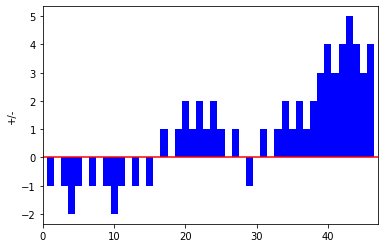

In [20]:
plt.bar(score["経過"], score['+/-'], color='blue', width=1.0)
plt.hlines([0], 0, len(score), 'red')
plt.ylabel('+/-')
plt.xlim(0, len(score))
plt.grid(False)

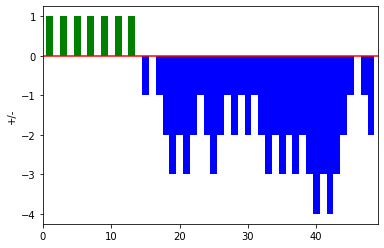

In [30]:
plt.bar(score["経過"], score['+'], color='green', width=1.0)
plt.bar(score["経過"], score['-'], color='blue', width=1.0)
plt.hlines([0], 0, len(score), 'red')
plt.ylabel('+/-')
plt.xlim(0, len(score))
plt.grid(False)
plt.savefig("{}.png".format(name), bbox_inches="tight")
plt.show()

## 単シーズン
### 年間成績

In [6]:
os.chdir('/Users/sasno/Desktop/MyPandas/vleague')

division = 'v1_w'
os.chdir(division)
s_round = '2020-21_regular'
yearly_all = pd.read_csv('all/{}/yearly_all.csv'.format(s_round),encoding='cp932')
yearly_all

,名前,チーム,背番号,得セット,失セット,勝敗,出場数,アタック打数,アタック得点,アタック失点,...,サーブ効果,受数,サーブレシーブ成功・優,サーブレシーブ成功・良,総得点,バックアタック決定率,アタックセット平均,ブロックセット平均,サーブ効果率,サーブレシーブ成功率
0,アキンラデウォフォルケ,久光スプリングス,16,39,36,10,72,386,192,12,...,61,13,4,3,265,0.0,2.67,0.81,11.9,42.3
1,アコスタロスランディ,PFUブルーキャッツ,18,16,37,4,53,743,272,36,...,28,317,146,81,293,37.9,5.13,0.28,5.1,58.8
2,オクム大庭冬美ハウィ,日立リヴァーレ,17,20,33,5,39,527,200,38,...,26,0,0,0,215,31.5,5.13,0.28,7.1,NaN
3,オズソイネリマン,NECレッドロケッツ,23,47,22,14,60,773,288,43,...,46,0,0,0,328,42.5,4.80,0.47,9.7,NaN
4,クランヤナ,東レアローズ,7,63,11,21,74,890,379,36,...,89,3,1,2,436,49.3,5.12,0.49,12.4,66.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,高相みな実,PFUブルーキャッツ,8,18,43,4,50,424,135,21,...,38,391,186,82,147,14.9,2.70,0.06,8.8,58.1
208,高野由里加,岡山シーガルズ,21,14,14,4,11,27,5,2,...,6,0,0,0,7,NaN,0.45,0.18,6.5,NaN
209,鴫原ひなた,トヨタ車体クインシーズ,1,22,45,6,59,435,137,34,...,65,340,159,78,154,21.4,2.32,0.14,13.2,58.2
210,黒後愛,東レアローズ,9,63,11,21,71,600,252,22,...,62,443,198,119,286,24.2,3.55,0.30,9.2,58.1


In [7]:
by_team_yearly = yearly_all.groupby(['チーム']).sum().reset_index()
by_team_yearly['アタック決定率'] = ((by_team_yearly['アタック得点'] / by_team_yearly['アタック打数']) * 100).round(1)
by_team_yearly['アタック効果率'] = (((by_team_yearly['アタック得点']-by_team_yearly['アタック失点']) / by_team_yearly['アタック打数']) * 100).round(1)
by_team_yearly['バックアタック決定率'] = ((by_team_yearly['バックアタック得点'] / by_team_yearly['バックアタック打数']) * 100).round(1)
by_team_yearly['アタックセット平均'] = (by_team_yearly['アタック得点'] / by_team_yearly['出場数']).round(2)
by_team_yearly['ブロックセット平均'] = (by_team_yearly['ブロック得点'] / by_team_yearly['出場数']).round(2)
by_team_yearly['サーブ効果率'] = ((by_team_yearly['サーブ得点'] * 100 + by_team_yearly['サーブ効果'] * 25 - by_team_yearly['サーブ失点'] * 25) / by_team_yearly['サーブ打数']).round(1)
by_team_yearly['サーブレシーブ成功率'] = ((by_team_yearly['サーブレシーブ成功・優'] * 100 + by_team_yearly['サーブレシーブ成功・良'] * 50) / by_team_yearly['受数']).round(1)
by_team_yearly.sort_values(['アタック得点'], ascending=False)

,チーム,背番号,得セット,失セット,勝敗,出場数,アタック打数,アタック得点,アタック失点,アタック決定率,...,サーブ効果,受数,サーブレシーブ成功・優,サーブレシーブ成功・良,総得点,バックアタック決定率,アタックセット平均,ブロックセット平均,サーブ効果率,サーブレシーブ成功率
9,岡山シーガルズ,372,546,560,154,819,3450,1229,146,35.6,...,387,1596,758,310,1398,24.1,1.50,0.16,6.8,57.2
6,ヴィクトリーナ姫路,177,364,784,56,775,3463,1219,176,35.2,...,507,1692,754,354,1398,30.5,1.57,0.14,9.1,55.0
0,JTマーヴェラス,171,728,294,224,725,2867,1194,136,41.6,...,518,1408,717,302,1423,44.8,1.65,0.22,9.6,61.6
2,NECレッドロケッツ,187,700,322,210,648,2947,1188,140,40.3,...,451,1375,596,344,1410,35.5,1.83,0.24,9.1,55.9
11,東レアローズ,120,882,154,294,688,2779,1186,124,42.7,...,498,1322,611,328,1436,34.9,1.72,0.23,10.0,58.6
4,デンソーエアリービーズ,216,616,448,168,716,3110,1163,149,37.4,...,476,1482,734,330,1369,33.0,1.62,0.21,8.8,60.7
8,埼玉上尾メディックス,213,574,434,168,651,3125,1143,133,36.6,...,467,1472,679,343,1340,29.1,1.76,0.21,8.5,57.8
10,日立リヴァーレ,159,392,742,84,756,3243,1138,217,35.1,...,544,1701,782,415,1394,24.0,1.51,0.23,10.2,58.2
7,久光スプリングス,222,560,546,140,727,3038,1118,148,36.8,...,462,1589,734,363,1375,25.1,1.54,0.26,8.7,57.6
1,KUROBEアクアフェアリーズ,199,336,728,56,699,2995,1001,195,33.4,...,422,1620,596,495,1178,34.8,1.43,0.19,7.4,52.1


In [8]:
# by_team_yearly = by_team_yearly.drop(['背番号', '得セット', '失セット', '勝敗', '出場数'], axis=1)
by_team_yearly = by_team_yearly.set_index('チーム')
by_team_yearly

,背番号,得セット,失セット,勝敗,出場数,アタック打数,アタック得点,アタック失点,アタック決定率,アタック効果率,...,サーブ効果,受数,サーブレシーブ成功・優,サーブレシーブ成功・良,総得点,バックアタック決定率,アタックセット平均,ブロックセット平均,サーブ効果率,サーブレシーブ成功率
チーム,,,,,,,,,,,,,,,,,,,,,
JTマーヴェラス,171,728,294,224,725,2867,1194,136,41.6,36.9,...,518,1408,717,302,1423,44.8,1.65,0.22,9.6,61.6
KUROBEアクアフェアリーズ,199,336,728,56,699,2995,1001,195,33.4,26.9,...,422,1620,596,495,1178,34.8,1.43,0.19,7.4,52.1
NECレッドロケッツ,187,700,322,210,648,2947,1188,140,40.3,35.6,...,451,1375,596,344,1410,35.5,1.83,0.24,9.1,55.9
PFUブルーキャッツ,189,250,596,56,576,2355,767,116,32.6,27.6,...,279,1273,543,319,902,27.4,1.33,0.15,6.7,55.2
デンソーエアリービーズ,216,616,448,168,716,3110,1163,149,37.4,32.6,...,476,1482,734,330,1369,33.0,1.62,0.21,8.8,60.7
トヨタ車体クインシーズ,202,336,672,84,609,2895,984,202,34.0,27.0,...,437,1559,653,370,1208,28.2,1.62,0.25,9.5,53.8
ヴィクトリーナ姫路,177,364,784,56,775,3463,1219,176,35.2,30.1,...,507,1692,754,354,1398,30.5,1.57,0.14,9.1,55.0
久光スプリングス,222,560,546,140,727,3038,1118,148,36.8,31.9,...,462,1589,734,363,1375,25.1,1.54,0.26,8.7,57.6
埼玉上尾メディックス,213,574,434,168,651,3125,1143,133,36.6,32.3,...,467,1472,679,343,1340,29.1,1.76,0.21,8.5,57.8


In [9]:
by_team_yearly_comp = by_team_yearly[['アタック決定率', 'アタック効果率', 'バックアタック決定率', 'アタックセット平均', 'ブロックセット平均','サーブ効果率', 'サーブレシーブ成功率']]
by_team_yearly_comp

,アタック決定率,アタック効果率,バックアタック決定率,アタックセット平均,ブロックセット平均,サーブ効果率,サーブレシーブ成功率
チーム,,,,,,,
JTマーヴェラス,41.6,36.9,44.8,1.65,0.22,9.6,61.6
KUROBEアクアフェアリーズ,33.4,26.9,34.8,1.43,0.19,7.4,52.1
NECレッドロケッツ,40.3,35.6,35.5,1.83,0.24,9.1,55.9
PFUブルーキャッツ,32.6,27.6,27.4,1.33,0.15,6.7,55.2
デンソーエアリービーズ,37.4,32.6,33.0,1.62,0.21,8.8,60.7
トヨタ車体クインシーズ,34.0,27.0,28.2,1.62,0.25,9.5,53.8
ヴィクトリーナ姫路,35.2,30.1,30.5,1.57,0.14,9.1,55.0
久光スプリングス,36.8,31.9,25.1,1.54,0.26,8.7,57.6
埼玉上尾メディックス,36.6,32.3,29.1,1.76,0.21,8.5,57.8


In [10]:
compare_list = ['アタック決定率', 'アタック効果率', 'バックアタック決定率', 'アタックセット平均', 'ブロックセット平均','サーブ効果率', 'サーブレシーブ成功率']

In [11]:
by_team_yearly_dv = pd.DataFrame()
for i in compare_list:
    compare = by_team_yearly_comp[i]
    mean = compare.mean()
    print(mean)
    std = compare.std(ddof=0)
    print(std)
    by_team_yearly_dv[i] = compare.map(lambda x: round((x - mean) / std * 10 + 50))
    
by_team_yearly_dv

36.775000000000006
3.0879132651895085
31.574999999999992
3.6629052676802885
30.950000000000003
5.776316588738304
1.5899999999999999
0.13521587677981212
0.2075
0.03788689307223102
8.700000000000001
1.120267825120404
56.975000000000016
2.6233328038966013


,アタック決定率,アタック効果率,バックアタック決定率,アタックセット平均,ブロックセット平均,サーブ効果率,サーブレシーブ成功率
JTマーヴェラス,66,65,74,54,53,58,68
KUROBEアクアフェアリーズ,39,37,57,38,45,38,31
NECレッドロケッツ,61,61,58,68,59,54,46
PFUブルーキャッツ,36,39,44,31,35,32,43
デンソーエアリービーズ,52,53,54,52,51,51,64
トヨタ車体クインシーズ,41,38,45,52,61,57,38
ヴィクトリーナ姫路,45,46,49,49,32,54,42
久光スプリングス,50,51,40,46,64,50,52
埼玉上尾メディックス,49,52,47,63,51,48,53
岡山シーガルズ,46,50,38,43,37,33,51


In [12]:
by_team_yearly_rank = by_team_yearly_comp.rank(ascending=False)
by_team_yearly_rank

,アタック決定率,アタック効果率,バックアタック決定率,アタックセット平均,ブロックセット平均,サーブ効果率,サーブレシーブ成功率
チーム,,,,,,,
JTマーヴェラス,2.0,2.0,1.0,4.0,6.0,3.0,1.0
KUROBEアクアフェアリーズ,11.0,12.0,4.0,11.0,9.0,10.0,12.0
NECレッドロケッツ,3.0,3.0,2.0,1.0,3.0,5.5,8.0
PFUブルーキャッツ,12.0,10.0,9.0,12.0,11.0,12.0,9.0
デンソーエアリービーズ,4.0,4.0,5.0,5.5,7.5,7.0,2.0
トヨタ車体クインシーズ,10.0,11.0,8.0,5.5,2.0,4.0,11.0
ヴィクトリーナ姫路,8.0,8.0,6.0,7.0,12.0,5.5,10.0
久光スプリングス,5.0,6.0,10.0,8.0,1.0,8.0,6.0
埼玉上尾メディックス,6.0,5.0,7.0,2.0,7.5,9.0,5.0


In [13]:
by_team_yearly_rank_t = by_team_yearly_rank.T
by_team_yearly_rank_t

チーム,JTマーヴェラス,KUROBEアクアフェアリーズ,NECレッドロケッツ,PFUブルーキャッツ,デンソーエアリービーズ,トヨタ車体クインシーズ,ヴィクトリーナ姫路,久光スプリングス,埼玉上尾メディックス,岡山シーガルズ,日立リヴァーレ,東レアローズ
アタック決定率,2.0,11.0,3.0,12.0,4.0,10.0,8.0,5.0,6.0,7.0,9.0,1.0
アタック効果率,2.0,12.0,3.0,10.0,4.0,11.0,8.0,6.0,5.0,7.0,9.0,1.0
バックアタック決定率,1.0,4.0,2.0,9.0,5.0,8.0,6.0,10.0,7.0,11.0,12.0,3.0
アタックセット平均,4.0,11.0,1.0,12.0,5.5,5.5,7.0,8.0,2.0,10.0,9.0,3.0
ブロックセット平均,6.0,9.0,3.0,11.0,7.5,2.0,12.0,1.0,7.5,10.0,4.5,4.5
サーブ効果率,3.0,10.0,5.5,12.0,7.0,4.0,5.5,8.0,9.0,11.0,1.0,2.0
サーブレシーブ成功率,1.0,12.0,8.0,9.0,2.0,11.0,10.0,6.0,5.0,7.0,4.0,3.0


In [14]:
team_ranking = by_team_yearly_rank_t.to_dict()
team_ranking

{'JTマーヴェラス': {'アタック決定率': 2.0,
  'アタック効果率': 2.0,
  'バックアタック決定率': 1.0,
  'アタックセット平均': 4.0,
  'ブロックセット平均': 6.0,
  'サーブ効果率': 3.0,
  'サーブレシーブ成功率': 1.0},
 'KUROBEアクアフェアリーズ': {'アタック決定率': 11.0,
  'アタック効果率': 12.0,
  'バックアタック決定率': 4.0,
  'アタックセット平均': 11.0,
  'ブロックセット平均': 9.0,
  'サーブ効果率': 10.0,
  'サーブレシーブ成功率': 12.0},
 'NECレッドロケッツ': {'アタック決定率': 3.0,
  'アタック効果率': 3.0,
  'バックアタック決定率': 2.0,
  'アタックセット平均': 1.0,
  'ブロックセット平均': 3.0,
  'サーブ効果率': 5.5,
  'サーブレシーブ成功率': 8.0},
 'PFUブルーキャッツ': {'アタック決定率': 12.0,
  'アタック効果率': 10.0,
  'バックアタック決定率': 9.0,
  'アタックセット平均': 12.0,
  'ブロックセット平均': 11.0,
  'サーブ効果率': 12.0,
  'サーブレシーブ成功率': 9.0},
 'デンソーエアリービーズ': {'アタック決定率': 4.0,
  'アタック効果率': 4.0,
  'バックアタック決定率': 5.0,
  'アタックセット平均': 5.5,
  'ブロックセット平均': 7.5,
  'サーブ効果率': 7.0,
  'サーブレシーブ成功率': 2.0},
 'トヨタ車体クインシーズ': {'アタック決定率': 10.0,
  'アタック効果率': 11.0,
  'バックアタック決定率': 8.0,
  'アタックセット平均': 5.5,
  'ブロックセット平均': 2.0,
  'サーブ効果率': 4.0,
  'サーブレシーブ成功率': 11.0},
 'ヴィクトリーナ姫路': {'アタック決定率': 8.0,
  'アタック効果率': 8.0,
  'バックアタック決定率': 6.0,
  'アタックセット平均

In [15]:
import re
p = re.compile('[\u0000-\u007F]+')

In [16]:
if division == 'v1_m':
    division_j = 'V1男子'
elif division == 'v1_w':
    division_j = 'V1女子'
elif division == 'v2_m':
    division_j = 'V2男子'
elif division == 'v2_w':
    division_j = 'V2女子'
elif division == 'v3_m':
    division_j = 'V3男子'
else:
    division_j = 'V3女子'

In [18]:
for team, stats in team_ranking.items():
    message = "チーム別成績\n"
    message += "シーズン: {}\n".format(s_round)
    message += "ディビジョン: #{}\n".format(division_j)
    message += "チーム: #{}\n".format(team)
    for i, rank in stats.items():
        message += "{}: {}位".format(i, int(rank))
        if rank % 1 == 0.5:
            message += "タイ"
        message += "\n"
    print(message)
    e_len = len(''.join(p.findall(message)))
    tweet_len = len(message) - (e_len/2)
#     print(tweet_len)
    if tweet_len <= 140:
        api.update_status(message)

チーム別成績
シーズン: 2020-21_regular
ディビジョン: #V1女子
チーム: #JTマーヴェラス
アタック決定率: 2位
アタック効果率: 2位
バックアタック決定率: 1位
アタックセット平均: 4位
ブロックセット平均: 6位
サーブ効果率: 3位
サーブレシーブ成功率: 1位

チーム別成績
シーズン: 2020-21_regular
ディビジョン: #V1女子
チーム: #KUROBEアクアフェアリーズ
アタック決定率: 11位
アタック効果率: 12位
バックアタック決定率: 4位
アタックセット平均: 11位
ブロックセット平均: 9位
サーブ効果率: 10位
サーブレシーブ成功率: 12位

チーム別成績
シーズン: 2020-21_regular
ディビジョン: #V1女子
チーム: #NECレッドロケッツ
アタック決定率: 3位
アタック効果率: 3位
バックアタック決定率: 2位
アタックセット平均: 1位
ブロックセット平均: 3位
サーブ効果率: 5位タイ
サーブレシーブ成功率: 8位

チーム別成績
シーズン: 2020-21_regular
ディビジョン: #V1女子
チーム: #PFUブルーキャッツ
アタック決定率: 12位
アタック効果率: 10位
バックアタック決定率: 9位
アタックセット平均: 12位
ブロックセット平均: 11位
サーブ効果率: 12位
サーブレシーブ成功率: 9位

チーム別成績
シーズン: 2020-21_regular
ディビジョン: #V1女子
チーム: #デンソーエアリービーズ
アタック決定率: 4位
アタック効果率: 4位
バックアタック決定率: 5位
アタックセット平均: 5位タイ
ブロックセット平均: 7位タイ
サーブ効果率: 7位
サーブレシーブ成功率: 2位

チーム別成績
シーズン: 2020-21_regular
ディビジョン: #V1女子
チーム: #トヨタ車体クインシーズ
アタック決定率: 10位
アタック効果率: 11位
バックアタック決定率: 8位
アタックセット平均: 5位タイ
ブロックセット平均: 2位
サーブ効果率: 4位
サーブレシーブ成功率: 11位

チーム別成績
シーズン: 2020-21_regular
ディビジョン: #V1女子
チーム: #ヴ

In [214]:
# 標準偏差
std = by_team_yearly_comp.std(ddof=0)
std

アタック決定率       2.656708
アタック効果率       2.948966
バックアタック決定率    1.778089
アタックセット平均     0.095818
ブロックセット平均     0.034699
サーブ効果率        1.092932
サーブレシーブ成功率    3.372017
dtype: float64

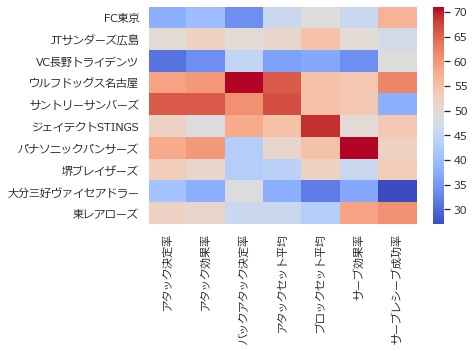

In [215]:
sns.set(font="meiryo")
sns.heatmap(by_team_yearly_dv, cmap="coolwarm")
plt.savefig("all/{}/heatmap.png".format(s_round), bbox_inches="tight")

### 日別成績

In [245]:
os.chdir('/Users/sasno/Desktop/MyPandas/vleague')

division = 'v1_m'
os.chdir(division)
s_round = '2020-21_regular'
daily_all = pd.read_csv('all/{}/daily_all.csv'.format(s_round),encoding='cp932')
daily_all

,試合日,年月,チーム,相手チーム,得セット,失セット,勝敗,背番号,リベロ,名前,...,サーブ打数,サーブ得点,サーブ失点,サーブ効果,サーブ効果率,受数,サーブレシーブ成功・優,サーブレシーブ成功・良,サーブレシーブ成功率,総得点
0,2020-10-17,2020-10,サントリーサンバーズ,ウルフドッグス名古屋,3,1,1,1,L,鶴田大樹,...,0,0,0,0,-,26,13,11,71.2,0
1,2020-10-17,2020-10,サントリーサンバーズ,ウルフドッグス名古屋,3,1,1,3,NaN,小野遥輝,...,11,1,3,0,2.3,0,0,0,-,9
2,2020-10-17,2020-10,サントリーサンバーズ,ウルフドッグス名古屋,3,1,1,4,NaN,鳥飼亜斗夢,...,0,0,0,0,-,0,0,0,-,0
3,2020-10-17,2020-10,サントリーサンバーズ,ウルフドッグス名古屋,3,1,1,5,NaN,松林憲太郎,...,0,0,0,0,-,0,0,0,-,0
4,2020-10-17,2020-10,サントリーサンバーズ,ウルフドッグス名古屋,3,1,1,8,NaN,柳田将洋,...,19,4,3,6,25.0,15,3,4,33.3,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3208,2021-02-14,2021-02,堺ブレイザーズ,VC長野トライデンツ,3,0,1,14,NaN,山口頌平,...,0,0,0,0,-,0,0,0,-,0
3209,2021-02-14,2021-02,堺ブレイザーズ,VC長野トライデンツ,3,0,1,20,L,山本智大,...,0,0,0,0,-,11,9,2,90.9,0
3210,2021-02-14,2021-02,堺ブレイザーズ,VC長野トライデンツ,3,0,1,21,NaN,竹元裕太郎,...,0,0,0,0,-,0,0,0,-,1
3211,2021-02-14,2021-02,堺ブレイザーズ,VC長野トライデンツ,3,0,1,23,NaN,鵜野幸也,...,9,0,1,2,2.8,14,7,4,64.3,15


In [246]:
win_daily_all = daily_all[daily_all['得セット']==3]
win_daily_all

,試合日,年月,チーム,相手チーム,得セット,失セット,勝敗,背番号,リベロ,名前,...,サーブ打数,サーブ得点,サーブ失点,サーブ効果,サーブ効果率,受数,サーブレシーブ成功・優,サーブレシーブ成功・良,サーブレシーブ成功率,総得点
0,2020-10-17,2020-10,サントリーサンバーズ,ウルフドッグス名古屋,3,1,1,1,L,鶴田大樹,...,0,0,0,0,-,26,13,11,71.2,0
1,2020-10-17,2020-10,サントリーサンバーズ,ウルフドッグス名古屋,3,1,1,3,NaN,小野遥輝,...,11,1,3,0,2.3,0,0,0,-,9
2,2020-10-17,2020-10,サントリーサンバーズ,ウルフドッグス名古屋,3,1,1,4,NaN,鳥飼亜斗夢,...,0,0,0,0,-,0,0,0,-,0
3,2020-10-17,2020-10,サントリーサンバーズ,ウルフドッグス名古屋,3,1,1,5,NaN,松林憲太郎,...,0,0,0,0,-,0,0,0,-,0
4,2020-10-17,2020-10,サントリーサンバーズ,ウルフドッグス名古屋,3,1,1,8,NaN,柳田将洋,...,19,4,3,6,25.0,15,3,4,33.3,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3208,2021-02-14,2021-02,堺ブレイザーズ,VC長野トライデンツ,3,0,1,14,NaN,山口頌平,...,0,0,0,0,-,0,0,0,-,0
3209,2021-02-14,2021-02,堺ブレイザーズ,VC長野トライデンツ,3,0,1,20,L,山本智大,...,0,0,0,0,-,11,9,2,90.9,0
3210,2021-02-14,2021-02,堺ブレイザーズ,VC長野トライデンツ,3,0,1,21,NaN,竹元裕太郎,...,0,0,0,0,-,0,0,0,-,1
3211,2021-02-14,2021-02,堺ブレイザーズ,VC長野トライデンツ,3,0,1,23,NaN,鵜野幸也,...,9,0,1,2,2.8,14,7,4,64.3,15


In [248]:
lose_daily_all = daily_all[daily_all['失セット']==3]
lose_daily_all

,試合日,年月,チーム,相手チーム,得セット,失セット,勝敗,背番号,リベロ,名前,...,サーブ打数,サーブ得点,サーブ失点,サーブ効果,サーブ効果率,受数,サーブレシーブ成功・優,サーブレシーブ成功・良,サーブレシーブ成功率,総得点
14,2020-10-17,2020-10,ウルフドッグス名古屋,サントリーサンバーズ,1,3,0,1,NaN,山田脩造,...,6,0,2,1,-4.2,8,6,1,81.2,3
15,2020-10-17,2020-10,ウルフドッグス名古屋,サントリーサンバーズ,1,3,0,2,NaN,山近哲,...,8,0,0,0,0.0,0,0,0,-,4
16,2020-10-17,2020-10,ウルフドッグス名古屋,サントリーサンバーズ,1,3,0,3,NaN,クレクバルトシュ,...,18,6,3,6,37.5,0,0,0,-,29
17,2020-10-17,2020-10,ウルフドッグス名古屋,サントリーサンバーズ,1,3,0,5,NaN,前田一誠,...,14,0,0,3,5.4,1,0,0,0.0,2
18,2020-10-17,2020-10,ウルフドッグス名古屋,サントリーサンバーズ,1,3,0,6,NaN,近裕崇,...,18,0,4,2,-2.8,1,1,0,100.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3194,2021-02-14,2021-02,VC長野トライデンツ,堺ブレイザーズ,0,3,0,13,NaN,椿芽久,...,0,0,0,0,-,0,0,0,-,0
3195,2021-02-14,2021-02,VC長野トライデンツ,堺ブレイザーズ,0,3,0,14,NaN,矢貫龍馬,...,10,0,0,2,5.0,1,1,0,100.0,4
3196,2021-02-14,2021-02,VC長野トライデンツ,堺ブレイザーズ,0,3,0,15,NaN,波佐間泰平,...,2,0,0,2,25.0,0,0,0,-,0
3197,2021-02-14,2021-02,VC長野トライデンツ,堺ブレイザーズ,0,3,0,21,NaN,高澤和貴,...,0,0,0,0,-,0,0,0,-,0


## 全シーズン

In [266]:
os.chdir('/Users/sasno/Desktop/MyPandas/vleague')

division = 'v1_w'
os.chdir(division)
seasons = get_seasons(division)
print(seasons)

{'303': '2020-21_regular', '304': '2020-21_Vcup_r', '305': '2020-21_Vcup_f', '277': '2019-20_regular', '279': '2019-20_final8_a', '293': '2019-20_final8_b', '292': '2019-20_semi_final_1', '294': '2019-20_semi_final_2', '295': '2019-20_final3', '282': '2019-20_final', '278': '2019-20_challenge4', '269': '2018-19_regular', '256': '2018-19_final8', '254': '2018-19_final3', '255': '2018-19_final', '273': '2018-19_challenge', '243': '2017-18_regular', '244': '2017-18_final6', '245': '2017-18_final3', '246': '2017-18_final', '221': '2016-17_regular', '220': '2016-17_final6', '219': '2016-17_final3', '222': '2016-17_final', '213': '2015-16_regular', '212': '2015-16_final6', '210': '2015-16_final3', '211': '2015-16_final', '179': '2014-15_regular', '177': '2014-15_final6', '180': '2014-15_final3', '178': '2014-15_final', '168': '2013-14_regular', '167': '2013-14_semi_final', '166': '2013-14_final', '154': '2012-13_regular', '153': '2012-13_semi_final', '155': '2012-13_final', '126': '2011-12_r

2020-21_regular
チーム別成績
シーズン: 2020-21_regular
ディビジョン: #V1女子
チーム: #JTマーヴェラス
アタック決定率: 2位
アタック効果率: 2位
バックアタック決定率: 1位
アタックセット平均: 5位
ブロックセット平均: 8位
サーブ効果率: 4位
サーブレシーブ成功率: 1位

121.5
チーム別成績
シーズン: 2020-21_regular
ディビジョン: #V1女子
チーム: #KUROBEアクアフェアリーズ
アタック決定率: 11位
アタック効果率: 11位
バックアタック決定率: 3位
アタックセット平均: 11位
ブロックセット平均: 9位
サーブ効果率: 10位
サーブレシーブ成功率: 12位

129.0
チーム別成績
シーズン: 2020-21_regular
ディビジョン: #V1女子
チーム: #NECレッドロケッツ
アタック決定率: 3位
アタック効果率: 3位
バックアタック決定率: 2位
アタックセット平均: 1位
ブロックセット平均: 4位
サーブ効果率: 6位
サーブレシーブ成功率: 8位

123.0
チーム別成績
シーズン: 2020-21_regular
ディビジョン: #V1女子
チーム: #PFUブルーキャッツ
アタック決定率: 12位
アタック効果率: 12位
バックアタック決定率: 9位
アタックセット平均: 12位
ブロックセット平均: 11位
サーブ効果率: 11位
サーブレシーブ成功率: 10位

126.0
チーム別成績
シーズン: 2020-21_regular
ディビジョン: #V1女子
チーム: #デンソーエアリービーズ
アタック決定率: 4位
アタック効果率: 4位タイ
バックアタック決定率: 5位
アタックセット平均: 3位
ブロックセット平均: 5位タイ
サーブ効果率: 5位
サーブレシーブ成功率: 2位

129.5
チーム別成績
シーズン: 2020-21_regular
ディビジョン: #V1女子
チーム: #トヨタ車体クインシーズ
アタック決定率: 10位
アタック効果率: 10位
バックアタック決定率: 8位
アタックセット平均: 6位
ブロックセット平均: 1位
サーブ効果率: 3位
サーブレシーブ成功率: 11位

127.0
チ

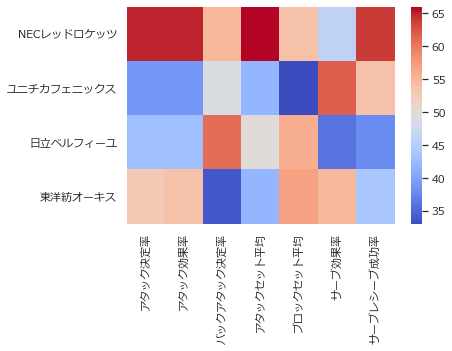

In [265]:
for s_round in seasons.values():
    print(s_round)
    try:
        yearly_all = pd.read_csv('all/{}/yearly_all.csv'.format(s_round),encoding='cp932')
        # yearly_all
        by_team_yearly = yearly_all.groupby(['チーム']).sum().reset_index()
        by_team_yearly['アタック決定率'] = ((by_team_yearly['アタック得点'] / by_team_yearly['アタック打数']) * 100).round(1)
        by_team_yearly['アタック効果率'] = (((by_team_yearly['アタック得点']-by_team_yearly['アタック失点']) / by_team_yearly['アタック打数']) * 100).round(1)
        by_team_yearly['バックアタック決定率'] = ((by_team_yearly['バックアタック得点'] / by_team_yearly['バックアタック打数']) * 100).round(1)
        by_team_yearly['アタックセット平均'] = (by_team_yearly['アタック得点'] / by_team_yearly['出場数']).round(2)
        by_team_yearly['ブロックセット平均'] = (by_team_yearly['ブロック得点'] / by_team_yearly['出場数']).round(2)
        by_team_yearly['サーブ効果率'] = ((by_team_yearly['サーブ得点'] * 100 + by_team_yearly['サーブ効果'] * 25 - by_team_yearly['サーブ失点'] * 25) / by_team_yearly['サーブ打数']).round(1)
        by_team_yearly['サーブレシーブ成功率'] = ((by_team_yearly['サーブレシーブ成功・優'] * 100 + by_team_yearly['サーブレシーブ成功・良'] * 50) / by_team_yearly['受数']).round(1)
        by_team_yearly.sort_values(['アタック得点'], ascending=False)
    # by_team_yearly
        by_team_yearly = by_team_yearly.set_index('チーム')
    # by_team_yearly
        by_team_yearly_comp = by_team_yearly[['アタック決定率', 'アタック効果率', 'バックアタック決定率', 'アタックセット平均', 'ブロックセット平均','サーブ効果率', 'サーブレシーブ成功率']]
    # by_team_yearly_comp
        compare_list = ['アタック決定率', 'アタック効果率', 'バックアタック決定率', 'アタックセット平均', 'ブロックセット平均','サーブ効果率', 'サーブレシーブ成功率']
        by_team_yearly_dv = pd.DataFrame()
        for i in compare_list:
            compare = by_team_yearly_comp[i]
            mean = compare.mean()
            # print(mean)
            std = compare.std(ddof=0)
            # print(std)
            by_team_yearly_dv[i] = compare.map(lambda x: round((x - mean) / std * 10 + 50))
    # by_team_yearly_dv
        by_team_yearly_rank = by_team_yearly_comp.rank(ascending=False)
    # by_team_yearly_rank
        by_team_yearly_rank_t = by_team_yearly_rank.T
    # by_team_yearly_rank_t
        team_ranking = by_team_yearly_rank_t.to_dict()
    # team_ranking
        if division == 'v1_m':
            division_j = 'V1男子'
        elif division == 'v1_w':
            division_j = 'V1女子'
        elif division == 'v2_m':
            division_j = 'V2男子'
        elif division == 'v2_w':
            division_j = 'V2女子'
        elif division == 'v3_m':
            division_j = 'V3男子'
        else:
            division_j = 'V3女子'
        for team, stats in team_ranking.items():
            message = "チーム別成績\n"
            message += "シーズン: {}\n".format(s_round)
            message += "ディビジョン: #{}\n".format(division_j)
            message += "チーム: #{}\n".format(team)
            for i, rank in stats.items():
                message += "{}: {}位".format(i, int(rank))
                if rank % 1 == 0.5:
                    message += "タイ"
                message += "\n"
            print(message)
            e_len = len(''.join(p.findall(message)))
            tweet_len = len(message) - (e_len/2)
            print(tweet_len)
    #     if tweet_len <= 140:
    #         api.update_status(message)
    # 図をリセット
        plt.clf()
        sns.set(font="meiryo")
        sns.heatmap(by_team_yearly_dv, cmap="coolwarm")
        plt.savefig("all/{}/heatmap.png".format(s_round), bbox_inches="tight")
    except:
        pass

### 使わないデータ処理

In [56]:
by_team_yearly = pd.merge(by_team_yearly, player_count, on='チーム')
by_team_yearly

,チーム,背番号,得セット,失セット,勝敗,出場数,アタック打数,アタック得点,アタック失点,アタック決定率,...,受数,サーブレシーブ成功・優,サーブレシーブ成功・良,総得点,バックアタック決定率,アタックセット平均,ブロックセット平均,サーブ効果率,サーブレシーブ成功率,player_count
0,JTマーヴェラス,164,560,210,168,546,2201,920,103,41.8,...,1073,564,236,1081,41.7,1.68,0.20,9.5,63.6,17
1,KUROBEアクアフェアリーズ,186,308,602,56,597,2603,875,175,33.6,...,1377,531,411,1021,35.3,1.47,0.18,7.4,53.5,15
2,NECレッドロケッツ,170,602,280,182,558,2558,1031,120,40.3,...,1204,527,299,1217,36.0,1.85,0.23,8.9,56.2,17
3,PFUブルーキャッツ,189,166,582,28,517,2120,669,110,31.6,...,1157,484,301,780,26.6,1.29,0.15,6.3,54.8,16
4,デンソーエアリービーズ,216,490,266,140,499,2284,851,106,37.3,...,1056,532,236,1010,33.2,1.71,0.22,9.1,61.6,17
5,トヨタ車体クインシーズ,202,336,504,84,506,2423,838,166,34.6,...,1287,539,314,1041,26.9,1.66,0.28,9.7,54.1,18
6,ヴィクトリーナ姫路,177,294,700,42,672,3011,1060,155,35.2,...,1482,665,304,1213,30.3,1.58,0.14,8.7,55.1,18
7,久光スプリングス,203,448,490,112,616,2553,949,123,37.2,...,1369,636,307,1156,25.0,1.54,0.25,8.2,57.7,18
8,埼玉上尾メディックス,213,448,406,126,554,2648,944,117,35.6,...,1242,584,279,1112,29.3,1.70,0.21,8.6,58.3,18
9,岡山シーガルズ,372,462,420,140,650,2733,998,107,36.5,...,1259,626,234,1134,26.0,1.54,0.17,6.2,59.0,22


In [57]:
by_team_yearly['背番号'] /= by_team_yearly['player_count']
by_team_yearly

,チーム,背番号,得セット,失セット,勝敗,出場数,アタック打数,アタック得点,アタック失点,アタック決定率,...,受数,サーブレシーブ成功・優,サーブレシーブ成功・良,総得点,バックアタック決定率,アタックセット平均,ブロックセット平均,サーブ効果率,サーブレシーブ成功率,player_count
0,JTマーヴェラス,9.647059,560,210,168,546,2201,920,103,41.8,...,1073,564,236,1081,41.7,1.68,0.20,9.5,63.6,17
1,KUROBEアクアフェアリーズ,12.400000,308,602,56,597,2603,875,175,33.6,...,1377,531,411,1021,35.3,1.47,0.18,7.4,53.5,15
2,NECレッドロケッツ,10.000000,602,280,182,558,2558,1031,120,40.3,...,1204,527,299,1217,36.0,1.85,0.23,8.9,56.2,17
3,PFUブルーキャッツ,11.812500,166,582,28,517,2120,669,110,31.6,...,1157,484,301,780,26.6,1.29,0.15,6.3,54.8,16
4,デンソーエアリービーズ,12.705882,490,266,140,499,2284,851,106,37.3,...,1056,532,236,1010,33.2,1.71,0.22,9.1,61.6,17
5,トヨタ車体クインシーズ,11.222222,336,504,84,506,2423,838,166,34.6,...,1287,539,314,1041,26.9,1.66,0.28,9.7,54.1,18
6,ヴィクトリーナ姫路,9.833333,294,700,42,672,3011,1060,155,35.2,...,1482,665,304,1213,30.3,1.58,0.14,8.7,55.1,18
7,久光スプリングス,11.277778,448,490,112,616,2553,949,123,37.2,...,1369,636,307,1156,25.0,1.54,0.25,8.2,57.7,18
8,埼玉上尾メディックス,11.833333,448,406,126,554,2648,944,117,35.6,...,1242,584,279,1112,29.3,1.70,0.21,8.6,58.3,18
9,岡山シーガルズ,16.909091,462,420,140,650,2733,998,107,36.5,...,1259,626,234,1134,26.0,1.54,0.17,6.2,59.0,22


## 月間成績

In [21]:
monthly_all = pd.read_csv('all/{}/monthly_all.csv'.format(s_round),encoding='cp932')
monthly_all

,名前,年月,チーム,背番号,月,得セット,失セット,勝敗,出場数,アタック打数,...,サーブ効果,受数,サーブレシーブ成功・優,サーブレシーブ成功・良,総得点,バックアタック決定率,アタックセット平均,ブロックセット平均,サーブ効果率,サーブレシーブ成功率
0,アキンラデウォフォルケ,2020-10,久光スプリングス,16,40,9,4,3,10,52,...,10,0,0,0,31,0.0,2.50,0.50,8.6,NaN
1,アキンラデウォフォルケ,2020-11,久光スプリングス,16,66,11,13,2,24,142,...,15,10,3,3,87,NaN,2.79,0.58,11.1,45.0
2,アキンラデウォフォルケ,2020-12,久光スプリングス,16,24,3,4,1,7,33,...,4,2,1,0,26,NaN,2.43,1.00,8.3,50.0
3,アキンラデウォフォルケ,2021-01,久光スプリングス,16,6,11,11,3,22,104,...,24,1,0,0,79,NaN,2.36,1.00,16.0,0.0
4,アキンラデウォフォルケ,2021-02,久光スプリングス,16,4,5,4,1,9,55,...,8,0,0,0,42,NaN,3.44,1.11,11.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,齋藤加奈子,2020-10,日立リヴァーレ,7,40,6,10,2,3,0,...,0,7,2,2,0,NaN,0.00,0.00,NaN,42.9
900,齋藤加奈子,2020-11,日立リヴァーレ,7,77,8,20,1,21,0,...,1,56,33,12,0,NaN,0.00,0.00,3.6,69.6
901,齋藤加奈子,2020-12,日立リヴァーレ,7,24,4,3,1,7,0,...,0,30,20,7,0,NaN,0.00,0.00,NaN,78.3
902,齋藤加奈子,2021-01,日立リヴァーレ,7,4,6,9,1,13,0,...,0,55,19,15,0,NaN,0.00,0.00,NaN,48.2


In [22]:
by_team_monthly = monthly_all.groupby(['チーム', '年月']).sum().reset_index()
by_team_monthly['アタック決定率'] = ((by_team_monthly['アタック得点'] / by_team_monthly['アタック打数']) * 100).round(1)
by_team_monthly['アタック効果率'] = (((by_team_monthly['アタック得点']-by_team_monthly['アタック失点']) / by_team_monthly['アタック打数']) * 100).round(1)
by_team_monthly['バックアタック決定率'] = ((by_team_monthly['バックアタック得点'] / by_team_monthly['バックアタック打数']) * 100).round(1)
by_team_monthly['アタックセット平均'] = (by_team_monthly['アタック得点'] / by_team_monthly['出場数']).round(2)
by_team_monthly['ブロックセット平均'] = (by_team_monthly['ブロック得点'] / by_team_monthly['出場数']).round(2)
by_team_monthly['サーブ効果率'] = ((by_team_monthly['サーブ得点'] * 100 + by_team_monthly['サーブ効果'] * 25 - by_team_monthly['サーブ失点'] * 25) / by_team_monthly['サーブ打数']).round(1)
by_team_monthly['サーブレシーブ成功率'] = ((by_team_monthly['サーブレシーブ成功・優'] * 100 + by_team_monthly['サーブレシーブ成功・良'] * 50) / by_team_monthly['受数']).round(1)
by_team_monthly = by_team_monthly.sort_values(['チーム', '年月'])
by_team_monthly

,チーム,年月,背番号,月,得セット,失セット,勝敗,出場数,アタック打数,アタック得点,...,サーブ効果,受数,サーブレシーブ成功・優,サーブレシーブ成功・良,総得点,バックアタック決定率,アタックセット平均,ブロックセット平均,サーブ効果率,サーブレシーブ成功率
0,JTマーヴェラス,2020-10,113,560,140,56,42,141,609,242,...,98,295,153,59,284,37.8,1.72,0.17,10.5,61.9
1,JTマーヴェラス,2020-11,134,1078,266,98,84,257,995,404,...,185,481,227,122,491,39.7,1.57,0.25,9.6,59.9
2,JTマーヴェラス,2020-12,132,336,84,0,28,59,264,123,...,48,120,82,10,136,57.1,2.08,0.14,9.3,72.5
3,JTマーヴェラス,2021-01,138,42,112,70,28,129,472,215,...,77,248,130,65,247,50.0,1.67,0.16,8.3,65.5
4,JTマーヴェラス,2021-02,129,112,126,70,42,139,527,210,...,110,264,125,46,265,48.1,1.51,0.30,9.8,56.1
5,KUROBEアクアフェアリーズ,2020-10,186,700,56,196,14,161,769,238,...,97,379,166,106,279,32.9,1.48,0.19,7.1,57.8
6,KUROBEアクアフェアリーズ,2020-11,166,924,182,154,42,219,905,340,...,149,488,187,135,393,40.8,1.55,0.16,8.8,52.2
7,KUROBEアクアフェアリーズ,2020-12,165,336,28,84,0,79,290,97,...,38,179,47,66,122,32.1,1.23,0.23,7.0,44.7
8,KUROBEアクアフェアリーズ,2021-01,186,70,56,210,0,176,796,253,...,104,416,151,135,287,31.0,1.44,0.15,5.8,52.5
9,KUROBEアクアフェアリーズ,2021-02,176,56,14,84,0,64,235,73,...,34,158,45,53,97,33.3,1.14,0.31,7.8,45.3


In [10]:
by_team_monthly.groupby(["チーム", "年月"]).sum()[["アタック決定率"]]

アタック決定率
チーム             年月              
JTマーヴェラス        2020-10     39.7
                2020-11     40.6
                2020-12     46.6
                2021-01     45.6
                2021-02     39.8
KUROBEアクアフェアリーズ 2020-10     30.9
                2020-11     37.6
                2020-12     33.4
                2021-01     31.8
                2021-02     31.1
NECレッドロケッツ      2020-10     40.3
                2020-11     39.1
                2020-12     39.8
                2021-01     42.3
                2021-02     40.4
PFUブルーキャッツ      2020-10     32.2
                2020-11     32.1
                2020-12     30.2
                2021-01     33.4
                2021-02     40.2
デンソーエアリービーズ     2020-10     37.2
                2020-11     36.9
                2020-12     38.3
                2021-01     37.3
                2021-02     38.0
トヨタ車体クインシーズ     2020-10     29.0
                2020-11     36.1
                2020-12     36.4
                2021-01     33.9
                2021-02     31.5
ヴィクトリーナ姫路       2020-10     33.9
                2020-11     34.4
                2020-12     40.8
                2021-01     34.6
                2021-02     38.3
久光スプリングス        2020-10     37.4
                2020-11     37.3
                2020-12     34.6
                2021-01     37.5
                2021-02     34.7
埼玉上尾メディックス      2020-10     33.3
                2020-11     36.5
                2020-12     35.1
                2021-01     38.3
                2021-02     41.7
岡山シーガルズ         2020-10     35.7
                2020-11     36.9
                2020-12     34.9
                2021-01     36.3
                2021-02     31.7
日立リヴァーレ         2020-10     39.0
                2020-11     33.5
                2020-12     32.7
                2021-01     34.3
                2021-02     36.1
東レアローズ          2020-10     43.8
                2020-11     42.9
                2020-12     40.6
                2021-01     41.7
                2021-02     44.0

In [70]:
graph_data = pd.pivot_table(by_team_monthly, index="年月", columns="チーム", values="アタック決定率")
graph_data

チーム,JTマーヴェラス,KUROBEアクアフェアリーズ,NECレッドロケッツ,PFUブルーキャッツ,デンソーエアリービーズ,トヨタ車体クインシーズ,ヴィクトリーナ姫路,久光スプリングス,埼玉上尾メディックス,岡山シーガルズ,日立リヴァーレ,東レアローズ
年月,,,,,,,,,,,,
2020-10,39.7,30.9,40.3,32.2,37.2,29.0,33.9,37.4,33.3,35.7,39.0,43.8
2020-11,40.6,37.6,39.1,32.1,36.9,36.1,34.4,37.3,36.5,36.9,33.5,42.9
2020-12,46.6,33.4,39.8,30.2,38.3,36.4,40.8,34.6,35.1,34.9,32.7,40.6
2021-01,45.6,31.8,42.3,33.4,37.3,33.9,34.6,37.5,38.3,36.3,34.3,41.7
2021-02,39.8,31.1,40.4,40.2,38.0,31.5,38.3,34.7,41.7,31.7,36.1,44.0


In [ ]:
graph_data

In [62]:
team = "東レアローズ"
team_monthly = by_team_monthly[by_team_monthly['チーム']==team]
team_monthly

,チーム,年月,背番号,月,得セット,失セット,勝敗,出場数,アタック打数,アタック得点,...,サーブ効果,受数,サーブレシーブ成功・優,サーブレシーブ成功・良,総得点,バックアタック決定率,アタックセット平均,ブロックセット平均,サーブ効果率,サーブレシーブ成功率
55,東レアローズ,2020-10,120,560,168,0,56,113,452,198,...,105,194,91,52,244,34.8,1.75,0.27,11.2,60.3
56,東レアローズ,2020-11,120,1078,294,98,98,257,1036,444,...,180,501,252,112,523,29.0,1.73,0.18,10.3,61.5
57,東レアローズ,2020-12,120,336,84,14,28,70,278,113,...,37,116,42,35,132,33.3,1.61,0.21,5.0,51.3
58,東レアローズ,2021-01,117,70,210,28,70,152,645,269,...,94,328,165,68,335,41.6,1.77,0.27,9.6,60.7
59,東レアローズ,2021-02,117,84,126,14,42,96,368,162,...,82,183,61,61,202,39.0,1.69,0.28,11.9,50.0


In [118]:
category = 'アタック決定率'
team_monthly[['年月', category]]

,年月,アタック決定率
55,2020-10,43.8
56,2020-11,42.9
57,2020-12,40.6
58,2021-01,41.7
59,2021-02,44.0


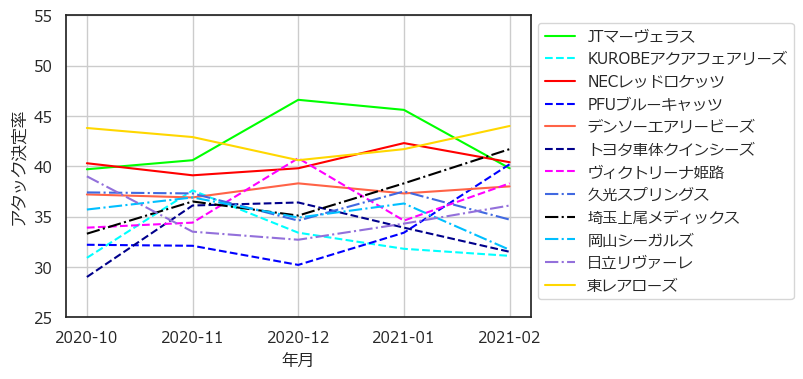

In [121]:
# plt.clf()
color_list = [['lime', None], ['aqua', "--"], ['red', None], ['blue', "--"], ['tomato', None],
              ['darkblue', "--"], ['magenta', "--"], ['royalblue', "-."], ['black', "-."],
              ['deepskyblue', "-."], ['mediumpurple', "-."], ['gold', None]]
x = team_monthly['年月']
fig1 = plt.figure(dpi = 100)
ax1 = fig1.add_subplot(111)
i = 0
for team, team_month in graph_data.iteritems():
    plt.plot(x, team_month, label=team, color=color_list[i][0], ls=color_list[i][1])
    plt.legend(bbox_to_anchor = (1,1), loc = 'best')
    i += 1
#     print(team)
#     print(team_month)
ax1.set_xlabel('年月')
ax1.set_ylabel(category)
ax1.set_ylim(25, 55)
ax1.grid()
plt.savefig("all/{}/{}.png".format(s_round, category), bbox_inches="tight")
plt.show()

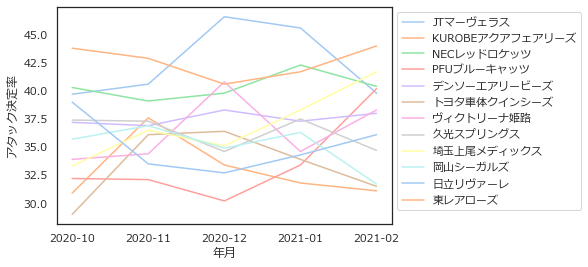

In [34]:
sns.set(style="white", font="meiryo")
ax= sns.lineplot(data=by_team_monthly, x="年月", y="アタック決定率", hue="チーム", palette="pastel")

ax.legend(loc="best", bbox_to_anchor=(1, 1))

In [69]:
graph_data

NameError: name 'graph_data' is not defined

In [26]:
by_team_yearly.to_csv('all/{}/by_team_yearly.csv'.format(s_round), index=False, encoding='cp932')
by_team_monthly.to_csv('all/{}/by_team_monthly.csv'.format(s_round), index=False, encoding='cp932')

## 複数年比較

In [280]:
os.chdir('/Users/sasno/Desktop/MyPandas/vleague')

division = 'v3_m'
os.chdir(division)
seasons = get_seasons(division)
print(seasons)

{'300': '2020-21_regular', '287': '2019-20_regular', '267': '2018-19_regular', '250': '2017-18_regular', '230': '2016-17_regular', '193': '2015-16_regular'}


In [281]:
all_list = []
for s_round in seasons.values():
    try:
        print(s_round)
        yearly_all = pd.read_csv('all/{}/yearly_all.csv'.format(s_round),encoding='cp932')
        all_list.append(yearly_all)
    except:
        pass
# print(all_list)
all_season = pd.concat(all_list, ignore_index=True)
all_season

2020-21_regular
2019-20_regular
2018-19_regular
2017-18_regular
2016-17_regular
2015-16_regular


,名前,チーム,背番号,出場数,アタック打数,アタック得点,アタック失点,アタック決定率,アタック効果率,バックアタック打数,...,サーブレシーブ成功・良,総得点,バックアタック決定率,アタックセット平均,ブロックセット平均,サーブ効果率,サーブレシーブ成功率,得セット,失セット,勝敗
0,フランシスムヤカバング,近畿クラブスフィーダ,22,9,21,12,2,57.1,47.6,0,...,0,16.0,NaN,1.33,0.44,-6.8,NaN,NaN,NaN,NaN
1,上田日登,千葉ZELVA,21,0,0,0,0,NaN,NaN,0,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,上竣,奈良ドリーマーズ,15,15,124,54,11,43.5,34.7,47,...,0,59.0,46.8,3.60,0.20,1.8,NaN,NaN,NaN,NaN
3,下町浩二,奈良ドリーマーズ,4,13,26,12,1,46.2,42.3,0,...,1,15.0,NaN,0.92,0.23,5.0,75.0,NaN,NaN,NaN
4,中山雄介,奈良ドリーマーズ,6,2,0,0,0,NaN,NaN,0,...,0,0.0,NaN,0.00,0.00,-12.5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,長濱裕,きんでんトリニティーブリッツ,3,58,0,0,0,NaN,NaN,0,...,0,0.0,NaN,0.00,0.00,NaN,62.9,51.0,11.0,16.0
729,長田翼,VC長野トライデンツ,24,5,0,0,0,NaN,NaN,0,...,0,0.0,NaN,0.00,0.00,3.6,NaN,9.0,3.0,3.0
730,関根翔太,千葉ZELVA,28,31,50,16,4,32.0,24.0,6,...,0,22.0,16.7,0.52,0.06,6.6,NaN,22.0,24.0,7.0
731,鳥越裕喜,近畿クラブスフィーダ,14,24,187,89,18,47.6,38.0,50,...,0,101.0,44.0,3.71,0.42,6.4,100.0,12.0,12.0,4.0


In [283]:
by_player_all_season = all_season.groupby(['名前']).sum().reset_index()
by_player_all_season['アタック決定率'] = ((by_player_all_season['アタック得点'] / by_player_all_season['アタック打数']) * 100).round(1)
by_player_all_season['アタック効果率'] = (((by_player_all_season['アタック得点']-by_player_all_season['アタック失点']) / by_player_all_season['アタック打数']) * 100).round(1)
by_player_all_season['バックアタック決定率'] = ((by_player_all_season['バックアタック得点'] / by_player_all_season['バックアタック打数']) * 100).round(1)
by_player_all_season['アタックセット平均'] = (by_player_all_season['アタック得点'] / by_player_all_season['出場数']).round(2)
by_player_all_season['ブロックセット平均'] = (by_player_all_season['ブロック得点'] / by_player_all_season['出場数']).round(2)
by_player_all_season['サーブ効果率'] = ((by_player_all_season['サーブ得点'] * 100 + by_player_all_season['サーブ効果'] * 25 - by_player_all_season['サーブ失点'] * 25) / by_player_all_season['サーブ打数']).round(1)
by_player_all_season['サーブレシーブ成功率'] = ((by_player_all_season['サーブレシーブ成功・優'] * 100 + by_player_all_season['サーブレシーブ成功・良'] * 50) / by_player_all_season['受数']).round(1)
# by_player_all_season = by_player_all_season.sort_values(['チーム', '年月'])
by_player_all_season

,名前,背番号,出場数,アタック打数,アタック得点,アタック失点,アタック決定率,アタック効果率,バックアタック打数,バックアタック得点,...,サーブレシーブ成功・良,総得点,バックアタック決定率,アタックセット平均,ブロックセット平均,サーブ効果率,サーブレシーブ成功率,得セット,失セット,勝敗
0,キューバスジョセフ,23,19,163,71,23,43.6,29.4,59,17,...,1,0.0,28.8,3.74,0.37,-1.2,25.0,0.0,0.0,0.0
1,フランシスムヤカバング,22,9,21,12,2,57.1,47.6,0,0,...,0,16.0,NaN,1.33,0.44,-6.8,NaN,0.0,0.0,0.0
2,ブルークインダレサレツ,13,13,139,57,15,41.0,30.2,51,21,...,0,0.0,41.2,4.38,0.54,-0.8,NaN,0.0,0.0,0.0
3,三浦拓,10,4,1,1,0,100.0,100.0,0,0,...,0,0.0,NaN,0.25,0.00,NaN,NaN,0.0,0.0,0.0
4,三浦拓也,20,137,633,253,69,40.0,29.1,33,8,...,136,0.0,24.2,1.85,0.26,9.2,65.9,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,鳥越裕喜,14,24,187,89,18,47.6,38.0,50,22,...,0,101.0,44.0,3.71,0.42,6.4,100.0,12.0,12.0,4.0
343,黒木隆生,57,200,689,370,35,53.7,48.6,1,1,...,0,196.0,100.0,1.85,0.79,6.3,81.0,51.0,11.0,16.0
344,齋藤侑亮,11,3,0,0,0,NaN,NaN,0,0,...,0,0.0,NaN,0.00,0.00,NaN,61.9,0.0,0.0,0.0
345,齋藤貴大,3,8,24,15,2,62.5,54.2,0,0,...,0,21.0,NaN,1.88,0.62,10.9,100.0,0.0,0.0,0.0


In [284]:
all_season_attack_ranking = by_player_all_season.sort_values(['アタック決定率'], ascending=False)
all_season_attack_ranking = all_season_attack_ranking[all_season_attack_ranking['アタック打数']>=300]
all_season_attack_ranking

,名前,背番号,出場数,アタック打数,アタック得点,アタック失点,アタック決定率,アタック効果率,バックアタック打数,バックアタック得点,...,サーブレシーブ成功・良,総得点,バックアタック決定率,アタックセット平均,ブロックセット平均,サーブ効果率,サーブレシーブ成功率,得セット,失セット,勝敗
332,陳建禎,19,67,493,287,41,58.2,49.9,153,90,...,27,0.0,58.8,4.28,0.63,8.8,70.5,0.0,0.0,0.0
81,塩大地,18,168,581,325,46,55.9,48.0,1,0,...,0,159.0,0.0,1.93,0.71,5.1,64.3,51.0,11.0,16.0
343,黒木隆生,57,200,689,370,35,53.7,48.6,1,1,...,0,196.0,100.0,1.85,0.79,6.3,81.0,51.0,11.0,16.0
327,長谷川博紀,16,127,566,303,31,53.5,48.1,2,1,...,2,0.0,50.0,2.39,0.58,2.3,71.4,0.0,0.0,0.0
213,河戸俊亮,18,227,615,320,34,52.0,46.5,2,1,...,1,62.0,50.0,1.41,0.81,6.6,68.8,16.0,22.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,大貫智博,30,219,442,147,25,33.3,27.6,0,0,...,3,73.0,NaN,0.67,0.40,3.6,60.7,13.0,50.0,2.0
302,西片圭佑,40,239,1570,518,123,33.0,25.2,308,91,...,6,272.0,29.5,2.17,0.17,7.0,41.4,13.0,50.0,2.0
260,石渡瑛法,48,184,463,150,58,32.4,19.9,8,1,...,216,0.0,12.5,0.82,0.10,8.2,65.3,0.0,0.0,0.0
87,大井手脩輔,67,129,352,114,28,32.4,24.4,5,2,...,36,32.0,40.0,0.88,0.05,4.7,59.3,29.0,33.0,8.0
